<a href="https://colab.research.google.com/github/Adityavdwiv/CSCI381/blob/main/A_Dwivedi_Quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load from GitHub
url = 'https://raw.githubusercontent.com/Adityavdwiv/CSCI381/main/automobile.csv'
column_names = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location",
    "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
    "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
    "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg",
    "price"
]
df = pd.read_csv(url, names=column_names, na_values='?')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df.dtypes

,0
symboling,int64
normalized-losses,float64
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [5]:
df.info()
df.describe(include='all')
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

,0
symboling,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


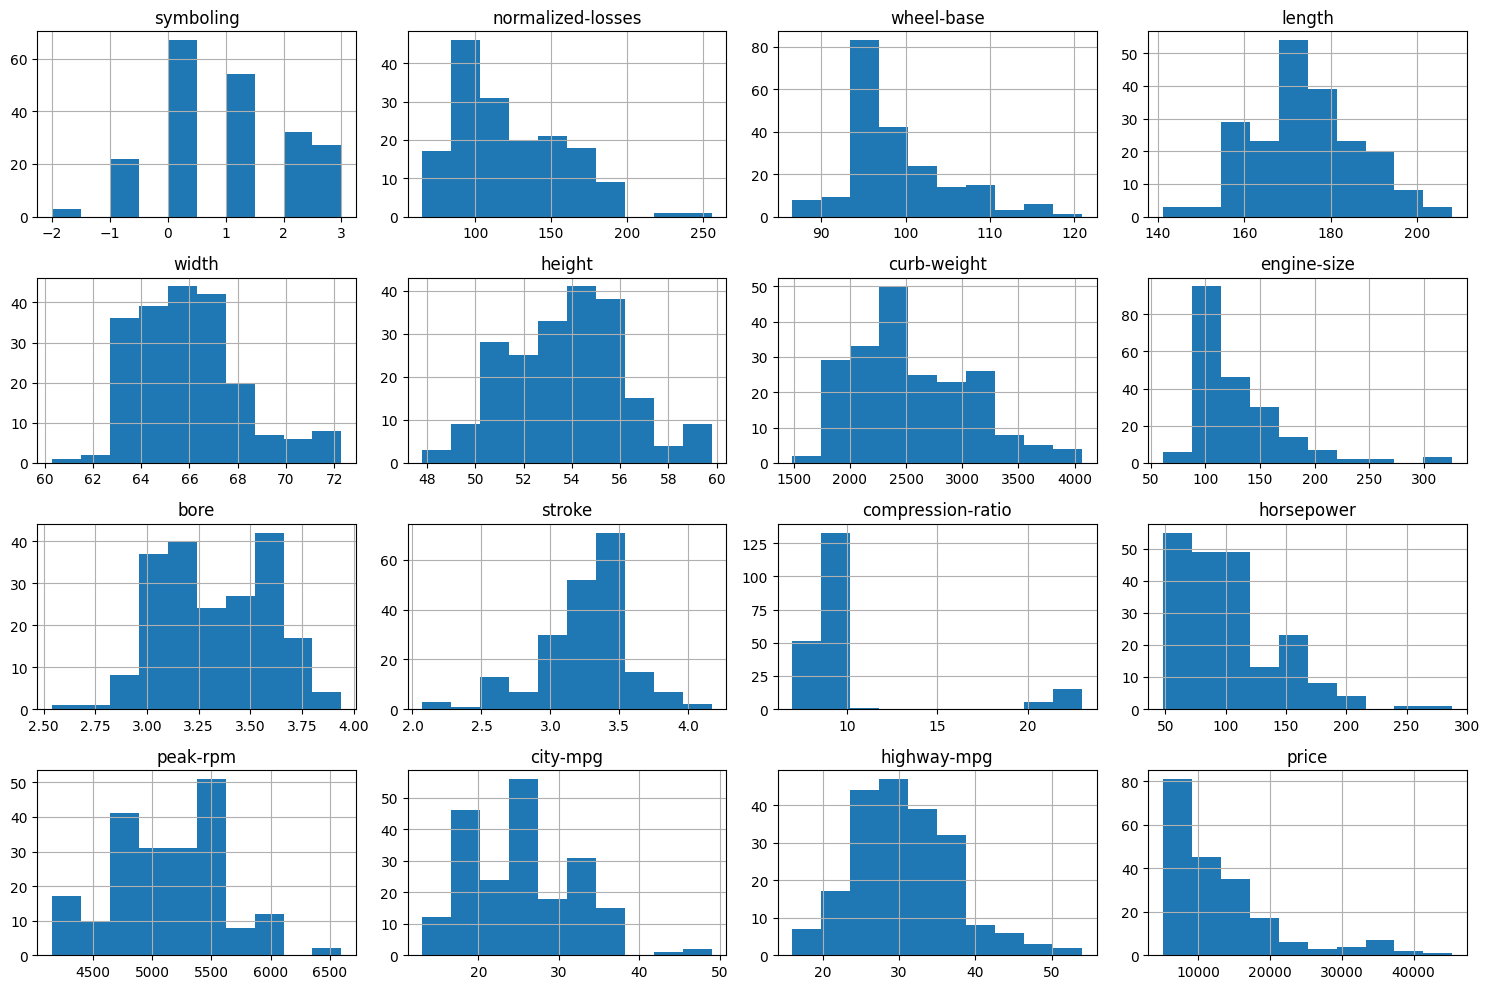

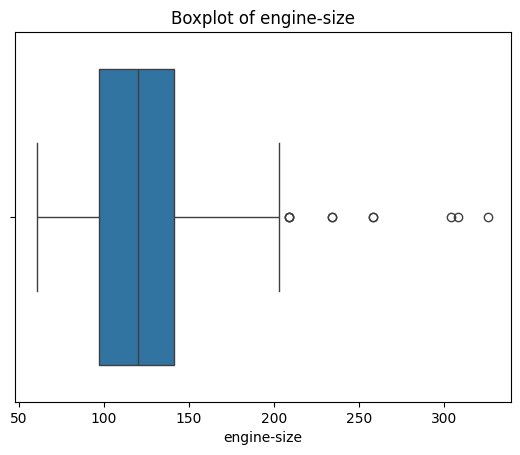

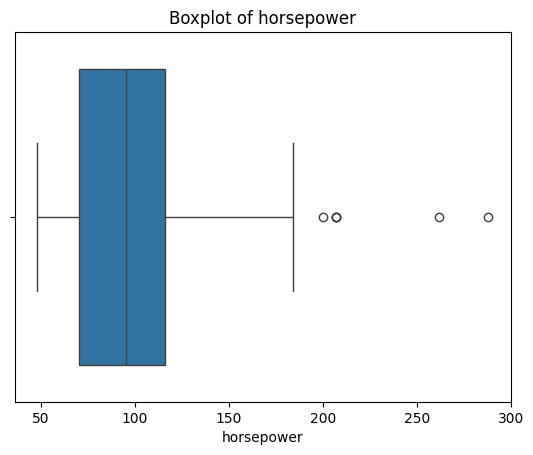

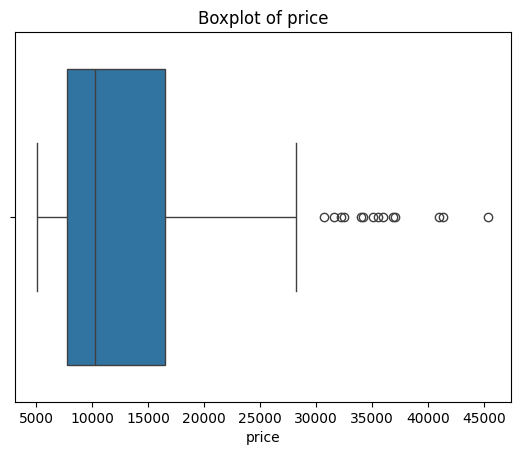

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include='number').columns
df[num_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

for col in ['engine-size', 'horsepower', 'price']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Variables with wide numeric ranges (e.g., price, horsepower) need scaling for ML models like KNN or gradient descent-based models.

In [7]:
# Missing values
df[['num-of-doors', 'price']].isna().sum()

# Imputation strategy example: Predicting based on related columns
from sklearn.impute import KNNImputer

# Encode categorical first
df['num-of-doors'] = df['num-of-doors'].map({'two': 2, 'four': 4})
imputer = KNNImputer(n_neighbors=3)
df[['num-of-doors', 'price']] = imputer.fit_transform(df[['num-of-doors', 'price']])

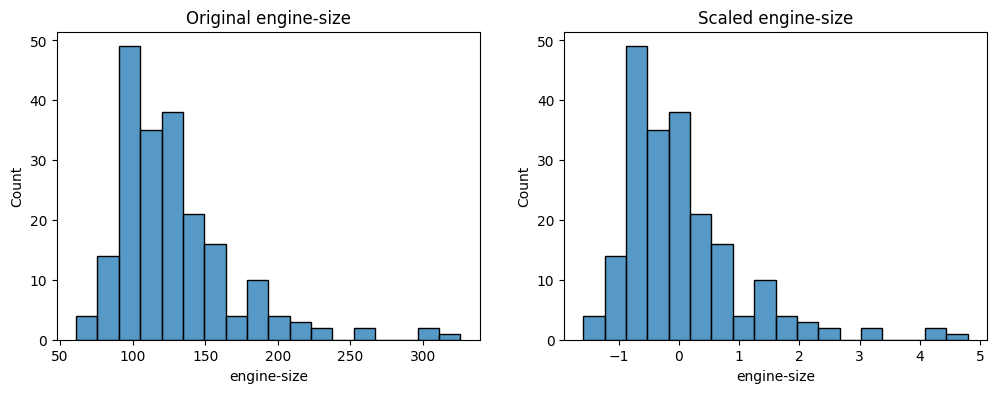

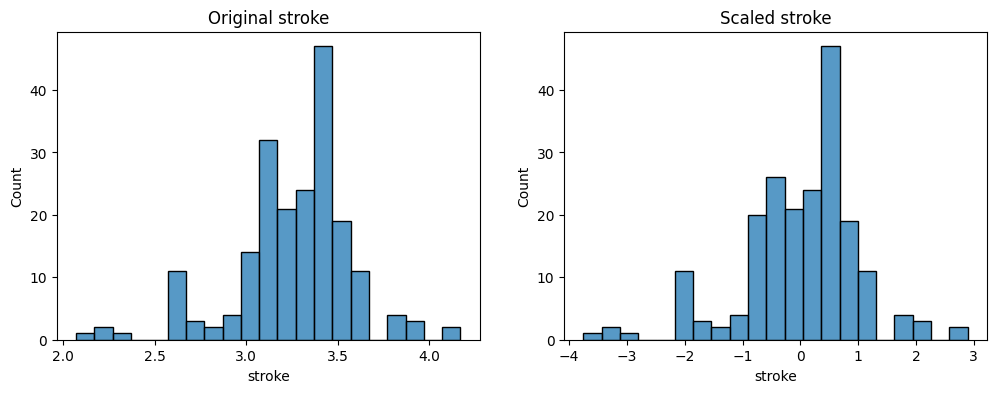

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['engine-size', 'stroke']] = scaler.fit_transform(df[['engine-size', 'stroke']])

# Plots before and after
for col in ['engine-size', 'stroke']:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], ax=axes[0]).set(title=f"Original {col}")
    sns.histplot(df_scaled[col], ax=axes[1]).set(title=f"Scaled {col}")
    plt.show()

- `symboling`: Numeric/Discrete
- `make`: Categorical/Nominal
- `engine-type`: Categorical/Nominal

In [9]:
df_encoded = df.copy()
df_encoded['symboling'] = df_encoded['symboling'].astype(int)
df_encoded = pd.get_dummies(df_encoded, columns=['make', 'engine-type'], drop_first=True)
df_encoded[['symboling'] + [col for col in df_encoded.columns if 'make_' in col or 'engine-type_' in col]].head()


,symboling,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,make_subaru,make_toyota,make_volkswagen,make_volvo,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,2,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ["wheel-base", "length", "width", "height", "curb-weight",
            "engine-size", "compression-ratio", "horsepower", "peak-rpm", "city-mpg"]
X = df[features].dropna()
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(X_scaled)

print("Original feature count:", X.shape[1])
print("PCA feature count:", X_pca.shape[1])
print("Explained variance per component:", pca.explained_variance_ratio_)

Original feature count: 10
PCA feature count: 6
Explained variance per component: [0.54689454 0.21545661 0.09192722 0.05835129 0.03053113 0.02285068]
